# Test statistics (TS) images with Gammapy

## Introduction

This notebook show how to compute a TS map for prepared Fermi data of the Galactic plane.

We will work with the following functions and classes:

* [gammapy.image.SkyImage](http://docs.gammapy.org/en/latest/api/gammapy.image.SkyImage.html)
* [gammapy.image.SkyImageList](http://docs.gammapy.org/en/latest/api/gammapy.image.SkyImageList.html)
* [gammapy.detect.compute_ts_map](http://docs.gammapy.org/en/latest/api/gammapy.detect.compute_ts_map.html)

TODO: give some more infos.

## Setup

Setup and imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from gammapy.image import SkyImageList
from gammapy.detect import compute_ts_image

# Compute TS image

In [2]:
# Load data from files
images = SkyImageList.read('../datasets/fermi_survey/all.fits.gz')

# Compute a source kernel (source template) in oversample mode,
# PSF is not taken into account
kernel = Gaussian2DKernel(2.5, mode='oversample')

# Compute a TS map. 'On' is the raw counts map, 'Background' is the background model,
# 'ExpGammaMap' denotes to the exposure map.
result = compute_ts_image(
    counts=images['COUNTS'],
    background=images['BACKGROUND'],
    exposure=images['EXPOSURE'],
    kernel=kernel,
)
print('TS map computation took {0:.2f} s'.format(result.meta['runtime']))

TS map computation took 6.44 s


# Plot results images

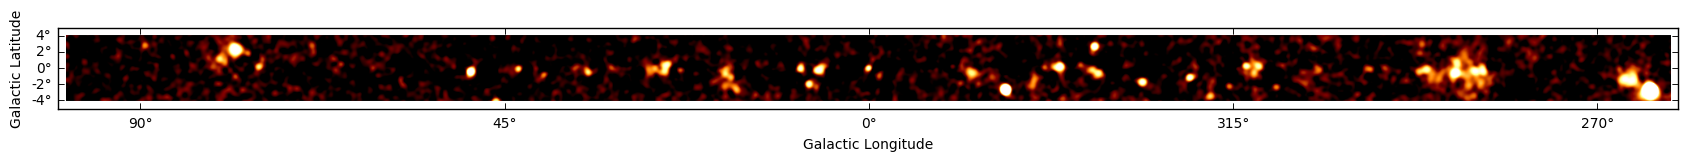

In [3]:
# Plot sqrt(TS) map
fig_ts = plt.figure(figsize=(18, 4))
ax_ts = fig_ts.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_ts.imshow(result['sqrt_ts'], cmap='afmhot', origin='lower', vmin=0, vmax=10)
ax_ts.coords['glon'].set_axislabel('Galactic Longitude')
ax_ts.coords['glat'].set_axislabel('Galactic Latitude')

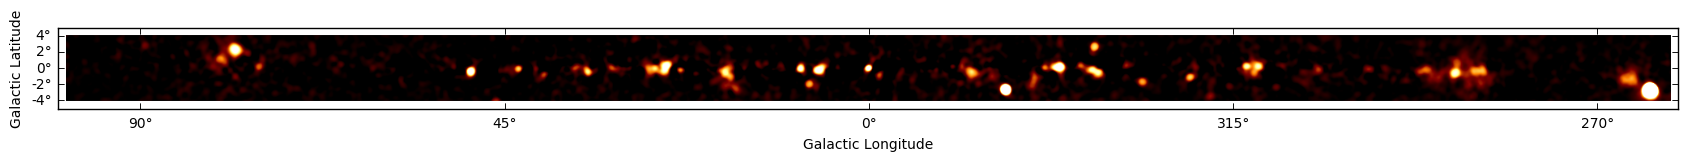

In [4]:
# Plot flux map (in units of m^-2 s^-1 TeV^-1)
fig_flux = plt.figure(figsize=(18, 4))
ax_flux = fig_flux.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_flux.imshow(result['amplitude'], cmap='afmhot', origin='lower', vmin=0, vmax=1E-9)
ax_flux.coords['glon'].set_axislabel('Galactic Longitude')
ax_flux.coords['glat'].set_axislabel('Galactic Latitude')

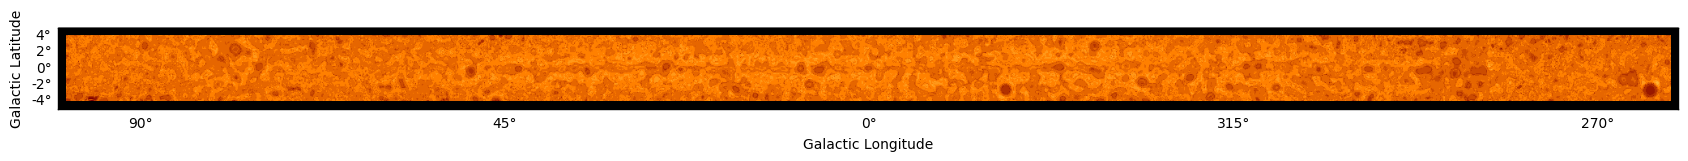

In [5]:
# Plot number of iterations of the fit per pixel
fig_iter = plt.figure(figsize=(18, 4))
ax_iter = fig_iter.add_axes([0.1, 0.1, 0.9, 0.9], projection=images['COUNTS'].wcs)
ax_iter.imshow(result['niter'], cmap='afmhot', origin='lower', vmin=0, vmax=20)
ax_iter.coords['glon'].set_axislabel('Galactic Longitude')
ax_iter.coords['glat'].set_axislabel('Galactic Latitude')

## Source catalog

TODO: run a peak finder to make a source catalog

## Exercises

TODO: put one or more exercises

## What next?

In this notebook, we have seen how to work with images and compute TS images from counts data, if a background estimate is already available.

- TODO: point to background estimation examples
- TODO: point to other docs ...